In [8]:
!pip install pandas

You should consider upgrading via the '/Users/lucbertin/Desktop/nouveau_projet/monenv/bin/python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd

# dans Pandas : Series, Index, DataFrame

### Series

one-dimensional array (comme un tableau à 1dimension<=> une liste 1 dimension) of indexed data

In [14]:
pd.Series(["Julie", "René", "Corentin", "Julien"], index=range(0,4))

0       Julie
1        René
2    Corentin
3      Julien
dtype: object

In [11]:
serie = pd.Series(["Julie", "René", "Corentin", "Julien"], 
          index=["etudiant1", "etudiant2", "etudiant3", "etudiant4"])

In [12]:
serie

etudiant1       Julie
etudiant2        René
etudiant3    Corentin
etudiant4      Julien
dtype: object

Une Series va etre l'élément constitutif d'une dataframe

Une Series c'est une colonne (avec un index)

In [13]:
serie.index

Index(['etudiant1', 'etudiant2', 'etudiant3', 'etudiant4'], dtype='object')

### une serie peut etre vue comme un dictionnaire 

* récupérer une valeur à partir d'une <strike> clé </strike> un index

In [15]:
serie["etudiant2"]

'René'

* modifier une valeur à partir de sa <strike> clé</strike> index

In [16]:
serie["etudiant2"] = "Martin"

In [17]:
serie

etudiant1       Julie
etudiant2      Martin
etudiant3    Corentin
etudiant4      Julien
dtype: object

* créer une nouvelle paire index:valeur

In [18]:
serie["etudiant5"] = "Thibault"

In [19]:
serie

etudiant1       Julie
etudiant2      Martin
etudiant3    Corentin
etudiant4      Julien
etudiant5    Thibault
dtype: object

* supprimer une index:valeur

In [20]:
del serie["etudiant5"]

In [21]:
serie

etudiant1       Julie
etudiant2      Martin
etudiant3    Corentin
etudiant4      Julien
dtype: object

In [25]:
"René" in serie.values

False

In [26]:
"Julie" in serie.values

True

In [27]:
"etudiant2" in serie # 0(1) iif index unique (hash.... hash table)

True

In [28]:
serie.values

array(['Julie', 'Martin', 'Corentin', 'Julien'], dtype=object)

## par rapport à un dictionnaire

In [32]:
serie = pd.Series(["Julie", "René", "Julie", "Corentin", "Julien"], 
          index=["etudiant1", "etudiant2", "etudiant2", "etudiant4", "etudiant5"])

In [33]:
serie # multiplicité des clés

etudiant1       Julie
etudiant2        René
etudiant2       Julie
etudiant4    Corentin
etudiant5      Julien
dtype: object

In [34]:
serie["etudiant2"]

etudiant2     René
etudiant2    Julie
dtype: object

In [38]:
serie2 = pd.Series( {"Julie": "+378947894", "Julien":"+8498944", "Martin":"+387373"},
                  index=["Martin", "Julien"]) # filter simplement si la serie comporte les index

In [39]:
serie2

Martin     +387373
Julien    +8498944
dtype: object

### slicer et indexer une pd.Series

## masking

In [43]:
serie3 = pd.Series( {"Julien": 18, "Martin": 25, "Sebastien":34})

In [46]:
serie3 >19 #mask = un array de booléens # element wise la condition

Julien       False
Martin        True
Sebastien     True
dtype: bool

In [50]:
est_majeur_mais_pas_trop_vieux = (serie3 >19) & (serie3 <34)   # and: if x>2 and x<4

In [52]:
est_majeur_mais_pas_trop_vieux

Julien       False
Martin        True
Sebastien    False
dtype: bool

In [53]:
serie3[ (serie3>19) & (serie3< 34)]

Martin    25
dtype: int64

## fancy indexing

faire passer une **liste** d'indexs dans la Series pour les récuperer

In [55]:
serie3

Julien       18
Martin       25
Sebastien    34
dtype: int64

In [54]:
serie3[  ["Julien", "Martin"]   ]

Julien    18
Martin    25
dtype: int64

## LOC et ILOC

In [75]:
serie3

Julien       18
Martin       25
Sebastien    34
dtype: int64

In [58]:
serie3.loc[["Martin", "Sebastien"]]

Martin       25
Sebastien    34
dtype: int64

In [62]:
serie3.loc["Martin":"Sebastien"] # seb inclus !!!

Martin       25
Sebastien    34
dtype: int64

In [74]:
serie3.iloc[0:1] # element numero1 (0-indexed) exclus !!!

Julien    18
dtype: int64

In [76]:
serie4 = pd.Series({1:25, 3:48, 4:58, 5:67})

In [77]:
serie4

1    25
3    48
4    58
5    67
dtype: int64

In [71]:
serie4.iloc[1:3] # bien exclus !!!

3    48
4    58
dtype: int64

In [70]:
serie4.loc[1:3] # inclus !!!

1    25
3    48
dtype: int64

In [78]:
serie4.iloc[[1,2]] # fancy indexing

3    48
4    58
dtype: int64

In [80]:
serie4.loc[[1,3]]

1    25
3    48
dtype: int64

## DataFrame

* sequence de Series "alignés"
* chaque Series est une colonne
* pd.DataFrame() est le constructeur de ma classe pd.DataFrame
* INdex sur les Rows, un index sur les colonnes
* ressemble à une table SQL ou un Excel

#### pd.DataFrame comme un dictionnaire de Series

In [187]:
serie1 =  pd.Series([18, 25, 86, 45, 36], 
                    index=["etudiant1", "etudiant2", "etudiant3", "etudiant4", "etudiant5"])
serie2 =  pd.Series(["Julien", "Luc", "Corentin","Julie", "Seb"], 
                    index=["etudiant1", "etudiant3", "etudiant2", "etudiant28", "etudiant49"])

In [229]:
df = pd.DataFrame(  { "age": serie1, "nom": serie2 }  )

In [161]:
df

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN
etudiant49,NaN,Seb
etudiant5,36.0,NaN


In [91]:
df.columns, df.index

(Index(['age', 'nom'], dtype='object'), RangeIndex(start=0, stop=5, step=1))

In [103]:
df.shape

(7, 2)

1ere dimension: les lignes

2eme dimension: les colonnes

## accès à une colonne

In [104]:
df["age"]

etudiant1     18.0
etudiant2     25.0
etudiant28     NaN
etudiant3     86.0
etudiant4     45.0
etudiant49     NaN
etudiant5     36.0
Name: age, dtype: float64

In [110]:
df["nombre_enfants"] = 2

In [111]:
df

,age,nom,nombre_enfants
etudiant1,18.0,Julien,2
etudiant2,25.0,Corentin,2
etudiant28,NaN,Julie,2
etudiant3,86.0,Luc,2
etudiant4,45.0,NaN,2
etudiant49,NaN,Seb,2
etudiant5,36.0,NaN,2


In [112]:
import numpy as np

In [113]:
df["nombre_enfants"] = np.exp(df["nombre_enfants"])

In [114]:
df

,age,nom,nombre_enfants
etudiant1,18.0,Julien,7.389056
etudiant2,25.0,Corentin,7.389056
etudiant28,NaN,Julie,7.389056
etudiant3,86.0,Luc,7.389056
etudiant4,45.0,NaN,7.389056
etudiant49,NaN,Seb,7.389056
etudiant5,36.0,NaN,7.389056


In [123]:
df2 = pd.DataFrame({ "age": [12,14], "nombre_enfants": pd.Series([34, 62], index=["etudiant1", "etudiant49"])})

In [124]:
df2

,age,nombre_enfants
etudiant1,12,34
etudiant49,14,62


In [125]:
df+df2

,age,nom,nombre_enfants
etudiant1,30.0,NaN,41.389056
etudiant2,NaN,NaN,NaN
etudiant28,NaN,NaN,NaN
etudiant3,NaN,NaN,NaN
etudiant4,NaN,NaN,NaN
etudiant49,NaN,NaN,69.389056
etudiant5,NaN,NaN,NaN


In [129]:
np.NaN / 25

nan

In [132]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)))

In [133]:
df2 = pd.DataFrame(np.random.randint(0, 10, (3, 4)))

In [134]:
df

,0,1,2,3
0,0,8,9,1
1,9,8,3,1
2,0,1,9,8


In [144]:
df2 = df2.sample(3)
df2

,0,1,2,3
1,8,0,9,7
0,8,5,7,9
2,2,8,8,1


In [145]:
df +df2

,0,1,2,3
0,8,13,16,10
1,17,8,12,8
2,2,9,17,9


# les opérations entre DataFrame ALIGNENT LES INDEX 

## selection

iloc et loc

In [162]:
df

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN
etudiant49,NaN,Seb
etudiant5,36.0,NaN


In [165]:
df.iloc[1, 1] # 2 dimensions (une virgule)

'Corentin'

In [166]:
df.loc["etudiant2", "nom"]

'Corentin'

mask c'est avant la virgule c'est l'opération sur les lignes

In [174]:
sappelleLucOuCorentinEtPlusde18 = (df["age"]  > 18) & ( ( df.nom == "Corentin") | (df.nom ==  "Luc"))

In [177]:
df.loc[ sappelleLucOuCorentinEtPlusde18, "age"   ]

etudiant2    25.0
etudiant3    86.0
Name: age, dtype: float64

In [179]:
df.loc["etudiant1":"etudiant4"]

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN


In [180]:
df.columns

Index(['age', 'nom'], dtype='object')

In [188]:
df.dtypes

age    float64
nom     object
dtype: object

In [189]:
serie1["etudiant6"] = "bonjour"

In [190]:
serie1

etudiant1         18
etudiant2         25
etudiant3         86
etudiant4         45
etudiant5         36
etudiant6    bonjour
dtype: object

In [191]:
del serie1["etudiant6"]

In [195]:
serie1 = serie1.astype(int)

In [196]:
serie1

etudiant1    18
etudiant2    25
etudiant3    86
etudiant4    45
etudiant5    36
dtype: int64

In [201]:
serie1["etudiant6"] = "Bonjour"

In [202]:
serie1

etudiant1         18
etudiant2         25
etudiant3         86
etudiant4         45
etudiant5         36
etudiant6    Bonjour
dtype: object

In [203]:
serie1 *2

etudiant1                36
etudiant2                50
etudiant3               172
etudiant4                90
etudiant5                72
etudiant6    BonjourBonjour
dtype: object

In [205]:
del serie1["etudiant6"]

In [206]:
serie1  = serie1.astype(int)

In [207]:
serie1 *2 

etudiant1     36
etudiant2     50
etudiant3    172
etudiant4     90
etudiant5     72
dtype: int64

In [208]:
df

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN
etudiant49,NaN,Seb
etudiant5,36.0,NaN


In [220]:
df.dropna(axis=1, thresh=0.89*df.shape[0])

""
etudiant1
etudiant2
etudiant28
etudiant3
etudiant4
etudiant49
etudiant5


In [224]:
df

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN
etudiant49,NaN,Seb
etudiant5,36.0,NaN


In [225]:
df.fillna(method="ffill")

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,25.0,Julie
etudiant3,86.0,Luc
etudiant4,45.0,Luc
etudiant49,45.0,Seb
etudiant5,36.0,Seb


### concaténation

In [226]:
df

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN
etudiant49,NaN,Seb
etudiant5,36.0,NaN


In [235]:
df2 = pd.DataFrame( { 
    "age": pd.Series([24, 36], index=["etudiant2", "etudiant3"]),
    "nom": pd.Series(["Martin", "Ferdinand"], index=["etudiant2", "etudiant3"])}
)

In [236]:
df

,age,nom
etudiant1,18.0,Julien
etudiant2,25.0,Corentin
etudiant28,NaN,Julie
etudiant3,86.0,Luc
etudiant4,45.0,NaN
etudiant49,NaN,Seb
etudiant5,36.0,NaN


In [237]:
df2

,age,nom
etudiant2,24,Martin
etudiant3,36,Ferdinand


In [253]:
pd.concat([df, df2], axis=1, keys=["source1", "source2"])

source1           source2           
               age       nom     age        nom
etudiant1     18.0    Julien     NaN        NaN
etudiant2     25.0  Corentin    24.0     Martin
etudiant28     NaN     Julie     NaN        NaN
etudiant3     86.0       Luc    36.0  Ferdinand
etudiant4     45.0       NaN     NaN        NaN
etudiant49     NaN       Seb     NaN        NaN
etudiant5     36.0       NaN     NaN        NaN

## merge/join

In [259]:
df_account = pd.DataFrame({'accountNumber': ["AC1", "AC2", "AC3", "AC4"],
                   'Amount': [10000, 109300, 2984, 1999],
                   'Name': ["LIVRET A", "Compte Épargne Retraite", "Quadretto", "Compte Courant"]})

df_client = pd.DataFrame({'id_account': ["AC1", "AC2", "AC3", "AC4", "AC5"],
                   'Name': ["Luc", "René", "Jean", "Jean", "Joseph"],
                   'id_client': ["ID1099", "ID1091", "ID1018", "ID1018", "ID1021"]})
df_account

,accountNumber,Amount,Name
0,AC1,10000,LIVRET A
1,AC2,109300,Compte Épargne Retraite
2,AC3,2984,Quadretto
3,AC4,1999,Compte Courant


In [260]:
df_client

,id_account,Name,id_client
0,AC1,Luc,ID1099
1,AC2,René,ID1091
2,AC3,Jean,ID1018
3,AC4,Jean,ID1018
4,AC5,Joseph,ID1021


In [279]:
df_merged =pd.merge(left=df_account , 
         right=df_client, 
         how='right',
         left_on="accountNumber",
         right_on="id_account",
         suffixes=["_account", "_client"])

In [280]:
df_merged.drop("id_account", axis=1, inplace=True)

In [281]:
df_merged

,accountNumber,Amount,Name_account,Name_client,id_client
0,AC1,10000.0,LIVRET A,Luc,ID1099
1,AC2,109300.0,Compte Épargne Retraite,René,ID1091
2,AC3,2984.0,Quadretto,Jean,ID1018
3,AC4,1999.0,Compte Courant,Jean,ID1018
4,NaN,NaN,NaN,Joseph,ID1021


In [283]:
!curl https://raw.githubusercontent.com/Luc-Bertin/TDs_ESILV/master/td3_discover_pandas/notes_eleves.csv -o "notes.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21979  100 21979    0     0  72778      0 --:--:-- --:--:-- --:--:-- 72778


In [19]:
df  = pd.read_csv("./notes.csv", encoding='utf8', index_col=0)

In [20]:
df

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1
4,eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
741,eleve174,100 %,ibo5,td3
742,eleve166,"66,67 %",ibo5,td3
743,eleve176,"83,33 %",ibo5,td3
744,eleve186,100 %,ibo5,td3


In [21]:
df.head(4)

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1


## comment appliquer une fonction sur une colonne

In [22]:
def function(val):
    # val c'est un élément de ma colonne ! 
    ## elements dans ma fonction
    if int(val[-1]) % 2 == 0:
        return "pair"
    else:
        return "impair"

In [23]:
df.eleve.apply(function)

0        pair
1      impair
2        pair
3        pair
4        pair
        ...  
741      pair
742      pair
743      pair
744      pair
745      pair
Name: eleve, Length: 746, dtype: object

## sort_values()

In [24]:
df.sort_values("eleve", inplace=True)

In [25]:
df

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
444,eleve0,80 %,ibo2,td2
691,eleve0,100 %,ibo2,td3
445,eleve1,100 %,ibo2,td2
692,eleve1,100 %,ibo2,td3
...,...,...,...,...
615,eleve98,100 %,ibo4,td2
45,eleve98,"42,86 %",Unknown,td1
704,eleve99,100 %,ibo2,td3
46,eleve99,"71,43 %",Unknown,td1


In [26]:
def function(row):
    if row["groupe"] == "ibo2":
        if row["quizz"] == "td2":
            return "NOTE ANNULEE"
        else:
            return "NOTE CONSERVEE"
    return "NOTE CONSERVEE"

In [27]:
df["conserveeOUpas"] = df.apply(function, axis=1)

In [28]:
df

,eleve,note,groupe,quizz,conserveeOUpas
0,eleve0,"71,43 %",Unknown,td1,NOTE CONSERVEE
444,eleve0,80 %,ibo2,td2,NOTE ANNULEE
691,eleve0,100 %,ibo2,td3,NOTE CONSERVEE
445,eleve1,100 %,ibo2,td2,NOTE ANNULEE
692,eleve1,100 %,ibo2,td3,NOTE CONSERVEE
...,...,...,...,...,...
615,eleve98,100 %,ibo4,td2,NOTE CONSERVEE
45,eleve98,"42,86 %",Unknown,td1,NOTE CONSERVEE
704,eleve99,100 %,ibo2,td3,NOTE CONSERVEE
46,eleve99,"71,43 %",Unknown,td1,NOTE CONSERVEE


In [29]:
df.dtypes

eleve             object
note              object
groupe            object
quizz             object
conserveeOUpas    object
dtype: object

## STR VECTORIZED MANIPULATIONS

function qui s'applique sur l'input entier (sur la colonne entiere, plutôt que chacun des elements de ma colone)

pandas vous procure des functions str vectorisées

In [30]:
string = "bonjour, au revoir"
string.split("o")[3]

'ir'

In [31]:
string.replace('o', 'a')

'banjaur, au revair'

In [32]:
(df.note
     .str.replace(',', '.')
     .str.replace('%','')
     .astype(float))

0       71.43
444     80.00
691    100.00
445    100.00
692    100.00
        ...  
615    100.00
45      42.86
704    100.00
46      71.43
460    100.00
Name: note, Length: 746, dtype: float64

In [33]:
string = "bonjour" # split ->> liste -->> join -->> string

In [34]:
"_".join(string.split('o'))

'b_nj_ur'

In [35]:
string.strip("o") # pour enlever des espaces inutiles

'bonjour'

In [36]:
" Place du Palais des COngrès      ".strip(" ")

'Place du Palais des COngrès'

In [37]:
df.note = (df.note
     .str.findall('(\d+),?(\d+)?')
     .str[0]
     .str.join(".")
     .str.strip('.').astype(float))

In [38]:
df.dtypes

eleve              object
note              float64
groupe             object
quizz              object
conserveeOUpas     object
dtype: object

In [39]:
df.head(3)

,eleve,note,groupe,quizz,conserveeOUpas
0,eleve0,71.43,Unknown,td1,NOTE CONSERVEE
444,eleve0,80.00,ibo2,td2,NOTE ANNULEE
691,eleve0,100.00,ibo2,td3,NOTE CONSERVEE


### Compter les nombres d'occurences dans la table/dataframe/dataset d'éléments différents dans une colonne

In [40]:
df.groupe.value_counts(ascending=True)

ibo2        57
ibo4        81
ibo3        85
ibo6        85
Unknown     92
ibo7       114
ibo5       115
ibo1       117
Name: groupe, dtype: int64

In [41]:
df["intervalle"] = pd.cut(df.note, bins=[0, 50, 75, 100], labels= ['Bad', 'Moyen','Bon'])

## Groupby

In [42]:
df.groupe.value_counts()

ibo1       117
ibo5       115
ibo7       114
Unknown     92
ibo6        85
ibo3        85
ibo4        81
ibo2        57
Name: groupe, dtype: int64

In [43]:
for name, group in df.groupby(['groupe', 'quizz']):
    print( 'nom {}, shape {}'.format( name, group.shape))

nom ('Unknown', 'td1'), shape (92, 6)
nom ('ibo1', 'td1'), shape (30, 6)
nom ('ibo1', 'td2'), shape (30, 6)
nom ('ibo1', 'td3'), shape (27, 6)
nom ('ibo1', 'td4'), shape (30, 6)
nom ('ibo2', 'td2'), shape (30, 6)
nom ('ibo2', 'td3'), shape (27, 6)
nom ('ibo3', 'td2'), shape (30, 6)
nom ('ibo3', 'td3'), shape (27, 6)
nom ('ibo3', 'td4'), shape (28, 6)
nom ('ibo4', 'td2'), shape (27, 6)
nom ('ibo4', 'td3'), shape (28, 6)
nom ('ibo4', 'td4'), shape (26, 6)
nom ('ibo5', 'td1'), shape (27, 6)
nom ('ibo5', 'td2'), shape (30, 6)
nom ('ibo5', 'td3'), shape (28, 6)
nom ('ibo5', 'td4'), shape (30, 6)
nom ('ibo6', 'td2'), shape (29, 6)
nom ('ibo6', 'td3'), shape (28, 6)
nom ('ibo6', 'td4'), shape (28, 6)
nom ('ibo7', 'td1'), shape (29, 6)
nom ('ibo7', 'td2'), shape (28, 6)
nom ('ibo7', 'td3'), shape (28, 6)
nom ('ibo7', 'td4'), shape (29, 6)


In [44]:
df.groupby(["groupe", "quizz"])["note"].mean()

groupe   quizz
Unknown  td1      63.664022
ibo1     td1      67.618000
         td2      94.666667
         td3      90.739630
         td4      96.666333
ibo2     td2      98.666667
         td3      95.678148
ibo3     td2      88.666667
         td3      88.887037
         td4      81.630357
ibo4     td2      87.407407
         td3      87.500000
         td4      89.009231
ibo5     td1      53.967407
         td2      90.000000
         td3      90.475714
         td4      84.759667
ibo6     td2      90.344828
         td3      83.332857
         td4      76.529286
ibo7     td1      74.875517
         td2      85.714286
         td3      94.642500
         td4      90.637931
Name: note, dtype: float64

In [45]:
df.groupby(["groupe", "quizz"])["note"].mean().unstack(level=0) # mean est une fonction d'aggrégation = moyenne

groupe,Unknown,ibo1,ibo2,ibo3,ibo4,ibo5,ibo6,ibo7
quizz,,,,,,,,
td1,63.664022,67.618000,NaN,NaN,NaN,53.967407,NaN,74.875517
td2,NaN,94.666667,98.666667,88.666667,87.407407,90.000000,90.344828,85.714286
td3,NaN,90.739630,95.678148,88.887037,87.500000,90.475714,83.332857,94.642500
td4,NaN,96.666333,NaN,81.630357,89.009231,84.759667,76.529286,90.637931


In [46]:
df[ (df.groupe == "ibo2") & (df.quizz == "td1")]

,eleve,note,groupe,quizz,conserveeOUpas,intervalle


In [47]:
df[ (df.groupe == "ibo1") & (df.quizz == "td1")]

,eleve,note,groupe,quizz,conserveeOUpas,intervalle
277,eleve102,57.14,ibo1,td1,NOTE CONSERVEE,Moyen
278,eleve103,42.86,ibo1,td1,NOTE CONSERVEE,Bad
279,eleve106,85.71,ibo1,td1,NOTE CONSERVEE,Bon
280,eleve110,85.71,ibo1,td1,NOTE CONSERVEE,Bon
264,eleve12,100.00,ibo1,td1,NOTE CONSERVEE,Bon
282,eleve131,71.43,ibo1,td1,NOTE CONSERVEE,Moyen
281,eleve133,71.43,ibo1,td1,NOTE CONSERVEE,Moyen
283,eleve147,71.43,ibo1,td1,NOTE CONSERVEE,Moyen
284,eleve153,42.86,ibo1,td1,NOTE CONSERVEE,Bad
285,eleve154,100.00,ibo1,td1,NOTE CONSERVEE,Bon


In [48]:
df.head(3)

,eleve,note,groupe,quizz,conserveeOUpas,intervalle
0,eleve0,71.43,Unknown,td1,NOTE CONSERVEE,Moyen
444,eleve0,80.00,ibo2,td2,NOTE ANNULEE,Bon
691,eleve0,100.00,ibo2,td3,NOTE CONSERVEE,Bon


In [49]:
df.groupe.replace("Unknown", np.NaN, inplace=True)

NameError: name 'np' is not defined

In [50]:
def function(x):
    return x**2

In [51]:
df.head()

,eleve,note,groupe,quizz,conserveeOUpas,intervalle
0,eleve0,71.43,Unknown,td1,NOTE CONSERVEE,Moyen
444,eleve0,80.00,ibo2,td2,NOTE ANNULEE,Bon
691,eleve0,100.00,ibo2,td3,NOTE CONSERVEE,Bon
445,eleve1,100.00,ibo2,td2,NOTE ANNULEE,Bon
692,eleve1,100.00,ibo2,td3,NOTE CONSERVEE,Bon


In [52]:
df["groupe"] = df.groupby("eleve")["groupe"].transform(lambda x: x.bfill().ffill())

In [53]:
df.groupby(["groupe", "quizz"])["note"].mean().unstack(level=0) # mean est une fonction d'aggrégation = moyenne

groupe,Unknown,ibo1,ibo2,ibo3,ibo4,ibo5,ibo6,ibo7
quizz,,,,,,,,
td1,63.664022,67.618000,NaN,NaN,NaN,53.967407,NaN,74.875517
td2,NaN,94.666667,98.666667,88.666667,87.407407,90.000000,90.344828,85.714286
td3,NaN,90.739630,95.678148,88.887037,87.500000,90.475714,83.332857,94.642500
td4,NaN,96.666333,NaN,81.630357,89.009231,84.759667,76.529286,90.637931


In [54]:
df.groupby(["groupe", "quizz"])["note"].sum()

groupe   quizz
Unknown  td1      5857.09
ibo1     td1      2028.54
         td2      2840.00
         td3      2449.97
         td4      2899.99
ibo2     td2      2960.00
         td3      2583.31
ibo3     td2      2660.00
         td3      2399.95
         td4      2285.65
ibo4     td2      2360.00
         td3      2450.00
         td4      2314.24
ibo5     td1      1457.12
         td2      2700.00
         td3      2533.32
         td4      2542.79
ibo6     td2      2620.00
         td3      2333.32
         td4      2142.82
ibo7     td1      2171.39
         td2      2400.00
         td3      2649.99
         td4      2628.50
Name: note, dtype: float64

In [55]:
!pip  install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import matplotlib.pyplot as plt

In [57]:
%matplotlib inline

<AxesSubplot:xlabel='groupe,quizz'>

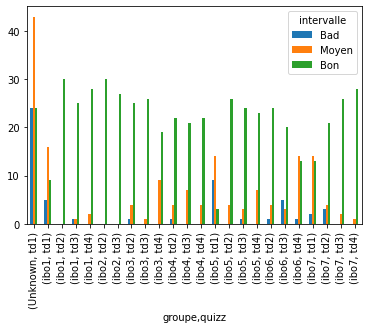

In [64]:
df.groupby(["groupe", "quizz"])["intervalle"].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='groupe,quizz'>

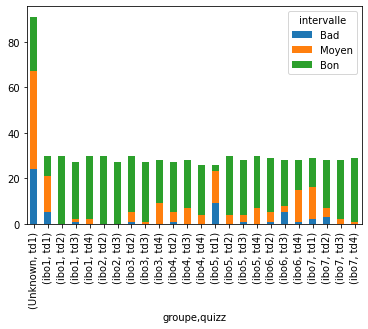

In [68]:
df.groupby(["groupe", "quizz"])["intervalle"].value_counts().unstack(level=2).plot(kind='bar', stacked=True)